In [8]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from itertools import product

In [2]:
data = pd.read_csv("solar_data_without_day.csv")

In [3]:
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

In [ ]:
p_values = range(0, 3)  
d_values = range(0, 2)  
q_values = range(0, 3)  

best_rmse = float('inf')
best_order = None

# Grid search for best parameters
for p, d, q in product(p_values, d_values, q_values):
    order = (p, d, q)
    try:
        model = ARIMA(train['Clearsky DHI'], order=order)
        model_fit = model.fit()
        predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
        rmse = np.sqrt(mean_squared_error(test['Clearsky DHI'], predictions))
        if rmse < best_rmse:
            best_rmse = rmse
            best_order = order
    except:
        continue

print('Best RMSE:', best_rmse)
print('Best Order:', best_order)


In [10]:
final_model = ARIMA(data['Clearsky DHI'], order=best_order)
final_model_fit = final_model.fit()

In [11]:
predictions = final_model_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

In [14]:
rmse = np.sqrt(mean_squared_error(test['Clearsky DHI'], predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 18.347


In [16]:
from sklearn.metrics import r2_score, mean_absolute_error

# Calculate R-squared
r_squared = r2_score(test['Clearsky DHI'], predictions)

# Calculate MAE
mae = mean_absolute_error(test['Clearsky DHI'], predictions)

print('R-squared: %.3f' % r_squared)
print('MAE: %.3f' % mae)


R-squared: 0.892
MAE: 11.339


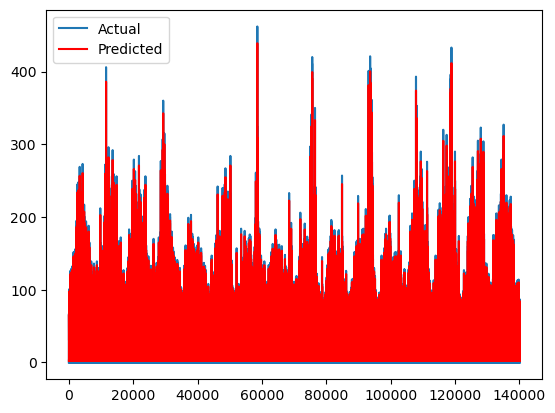

In [18]:
plt.plot(test['Clearsky DHI'].values, label='Actual')
plt.plot(predictions.values, color='red', label='Predicted')
plt.legend()
plt.show()